# Pokedex Scraper


***

### Import the correct libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

### Fetch the HTML of the webpage through Scraping

In [2]:
url = "https://pokemondb.net/pokedex/all"

page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#print(soup)

### Find the tags with Pokemon information

In [3]:
pokemons = soup.find_all("tr")
#print(pokemons)

### Some auxiliary functions to manipulate data

+ ```not_digit``` to find the chars in an String
+ ```name_and_type``` to manipulate the String

In [4]:
def not_digit(element :str) -> bool:
    return not element.isdigit()

def name_and_type(info:list, pokemon_types: list) -> tuple:
    raw = list(filter(not_digit, info))

    if len(raw) == 4:
        name = raw[0]+'('+raw[1]+')'
        type = raw[2]+'/'+raw[3]
    elif len(raw) == 3:
        if raw[1] in pokemon_types:
            name = raw[0]
            type = raw[1]+'/'+raw[2]
        else:
            name = raw[0]+'('+raw[1]+')'
            type = raw[2]
    else:
        name = raw[0]
        type = raw[1]
    
    return(name,type)

### Some variables to help the construction of the Dataframe

+ ```pokemon_types``` an list with all pokemon types
+ ```regex``` an compiled regex expression to extract the information at the HTML
+ ```NUMBERS,NAMES,TYPES``` variables to create the Dataframe Columns

In [5]:
pokemon_types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice",
                 "Fighting", "Poison", "Ground", "Flying", "Psychic",
                 "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]

In [6]:
regex = re.compile(r'>(\w[\w\s\u2640\u2642\-\'\:]+)<')

In [7]:
NUMBERS = []
NAMES = []
TYPES = []

### Dataframe creation

In [8]:
for pkmn in pokemons[1:]:
    info = regex.findall(str(pkmn))
    number = int(info[0])
    name, type = name_and_type(info, pokemon_types)

    NUMBERS.append(number)
    NAMES.append(name)
    TYPES.append(type)

dex = pd.DataFrame(data={'#':NUMBERS, 'Name':NAMES, 'Type': TYPES})

print(dex)

         #                     Name             Type
0        1                Bulbasaur     Grass/Poison
1        2                  Ivysaur     Grass/Poison
2        3                 Venusaur     Grass/Poison
3        3  Venusaur(Mega Venusaur)     Grass/Poison
4        4               Charmander             Fire
...    ...                      ...              ...
1204  1020             Gouging Fire      Fire/Dragon
1205  1021              Raging Bolt  Electric/Dragon
1206  1022             Iron Boulder     Rock/Psychic
1207  1023               Iron Crown    Steel/Psychic
1208  1024   Terapagos(Normal Form)           Normal

[1209 rows x 3 columns]


### Filtering by column value

In [9]:
gen1 = dex[dex['#'] <= 151]
print(gen1)

       #                     Name              Type
0      1                Bulbasaur      Grass/Poison
1      2                  Ivysaur      Grass/Poison
2      3                 Venusaur      Grass/Poison
3      3  Venusaur(Mega Venusaur)      Grass/Poison
4      4               Charmander              Fire
..   ...                      ...               ...
199  149                Dragonite     Dragon/Flying
200  150                   Mewtwo           Psychic
201  150    Mewtwo(Mega Mewtwo X)  Psychic/Fighting
202  150    Mewtwo(Mega Mewtwo Y)           Psychic
203  151                      Mew           Psychic

[204 rows x 3 columns]


### Using queries

In [10]:
megas = dex.query("Name.str.contains('Mega ')")
print(megas)

       #                         Name              Type
3      3      Venusaur(Mega Venusaur)      Grass/Poison
7      6  Charizard(Mega Charizard X)       Fire/Dragon
8      6  Charizard(Mega Charizard Y)       Fire/Flying
12     9    Blastoise(Mega Blastoise)             Water
19    15      Beedrill(Mega Beedrill)        Bug/Poison
23    18        Pidgeot(Mega Pidgeot)     Normal/Flying
86    65      Alakazam(Mega Alakazam)           Psychic
108   80        Slowbro(Mega Slowbro)     Water/Psychic
127   94          Gengar(Mega Gengar)      Ghost/Poison
154  115  Kangaskhan(Mega Kangaskhan)            Normal
168  127          Pinsir(Mega Pinsir)        Bug/Flying
175  130      Gyarados(Mega Gyarados)        Water/Dark
189  142  Aerodactyl(Mega Aerodactyl)       Rock/Flying
201  150        Mewtwo(Mega Mewtwo X)  Psychic/Fighting
202  150        Mewtwo(Mega Mewtwo Y)           Psychic
235  181      Ampharos(Mega Ampharos)   Electric/Dragon
265  208        Steelix(Mega Steelix)      Steel

### Bar Plot with query results

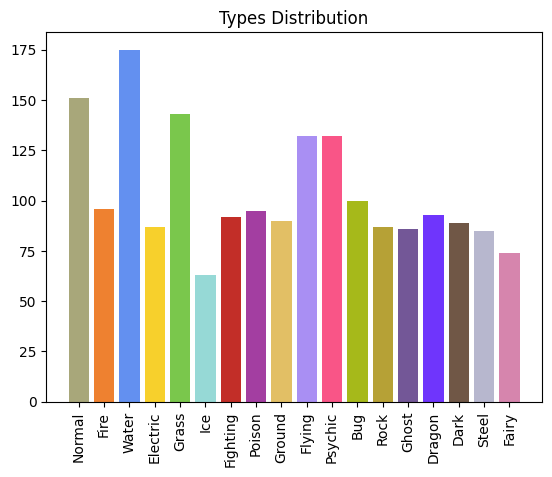

In [11]:
type_count = []
for tp in pokemon_types:
    type_count.append(len(dex.query("Type.str.contains(@tp)")))

type_colors = ['#A8A77A','#EE8130','#6390F0','#F7D02C','#7AC74C','#96D9D6',
               '#C22E28','#A33EA1','#E2BF65','#A98FF3','#F95587','#A6B91A',
               '#B6A136','#735797','#6F35FC','#705746','#B7B7CE','#D685AD']

fig, ax = plt.subplots()

ax.bar(pokemon_types, type_count, color= type_colors)

ax.set_title('Types Distribution')

plt.xticks(rotation = 90)

plt.show()

### Pie Plot with query

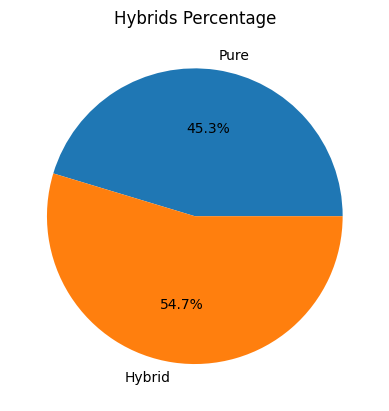

In [12]:
hybrid = len(dex.query("Type.str.contains('/')"))

pure = len(dex) - hybrid

fig, ax = plt.subplots()
ax.pie([pure,hybrid], labels=['Pure', 'Hybrid'], autopct='%1.1f%%')

ax.set_title('Hybrids Percentage')

plt.show()

### Creating a second Dataframe through queries and plot with the information

In [13]:
water_dex = dex.query("Type.str.contains('Water')")

print(water_dex)

         #                       Name          Type
9        7                   Squirtle         Water
10       8                  Wartortle         Water
11       9                  Blastoise         Water
12       9  Blastoise(Mega Blastoise)         Water
72      54                    Psyduck         Water
...    ...                        ...           ...
1158   978      Tatsugiri(Curly Form)  Dragon/Water
1159   978     Tatsugiri(Droopy Form)  Dragon/Water
1160   978   Tatsugiri(Stretchy Form)  Dragon/Water
1174   991                Iron Bundle     Ice/Water
1193  1009               Walking Wake  Water/Dragon

[175 rows x 3 columns]


In [14]:
total = len(water_dex)  
hybrids = len(water_dex.query("Type.str.contains('/')"))

pure_water = total - hybrids

print(f"{pure_water} out of {total}")

81 out of 175


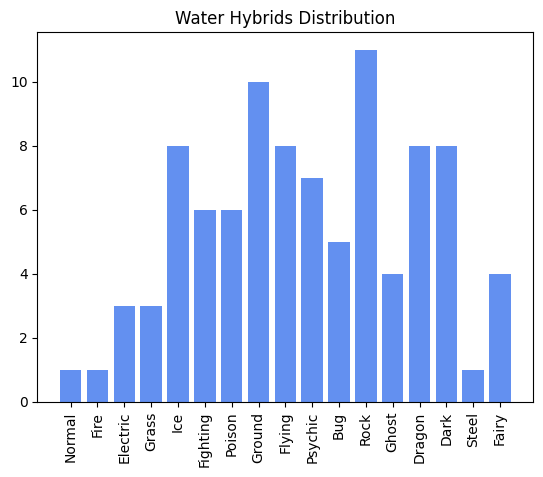

In [15]:
new_types = pokemon_types
new_types.remove('Water')

water_count = []

for nt in new_types:
    water_count.append(len(water_dex.query("Type.str.contains(@nt)")))

count = len(water_dex) - len(water_dex.query("Type.str.contains('/')"))

fig, ax = plt.subplots()

ax.bar(new_types, water_count, color='#6390F0')

ax.set_title('Water Hybrids Distribution')

plt.xticks(rotation = 90)

plt.show()